**Integrantes:**

García Mejía, Martina

#### Importando paquetes

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### Haciendo cálculos

Importamos los datos del archivo y graficamos:

In [7]:
data = np.genfromtxt("datos-carro-1d.csv", delimiter=',', missing_values=np.nan, skip_header=5)

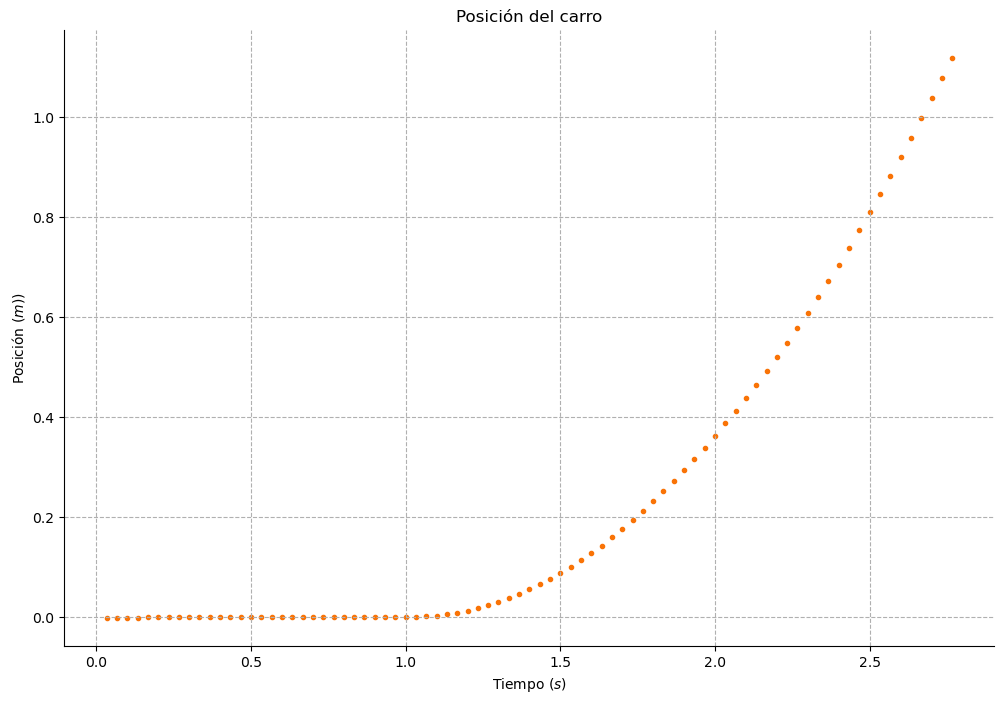

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], color="xkcd:orange", marker='.', label="Altura máxima (m)")
plt.xlabel("Tiempo $(s)$")
plt.ylabel("Posición $(m))$")
plt.title("Posición del carro")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
#plt.savefig("Hmax.png", dpi=300)
plt.show()

In [61]:
datafilter = data[:,1] > 0.004
fdata = data[datafilter]
print(f"Inicio del movimiento: {fdata[0:1,0][0]:.3f}s")

Inicio del movimiento: 1.133s


El movimiento comienza aproximadamente en $t_{0}=1.13s$.

Ahora realizamos la regresión no lineal y graficamos:

In [54]:
def fitfunc(t,x0,v0,a):
    return x0 + v0*t + 0.5*a*(t**2)

param = curve_fit(fitfunc, fdata[:,0], fdata[:,1])[0]

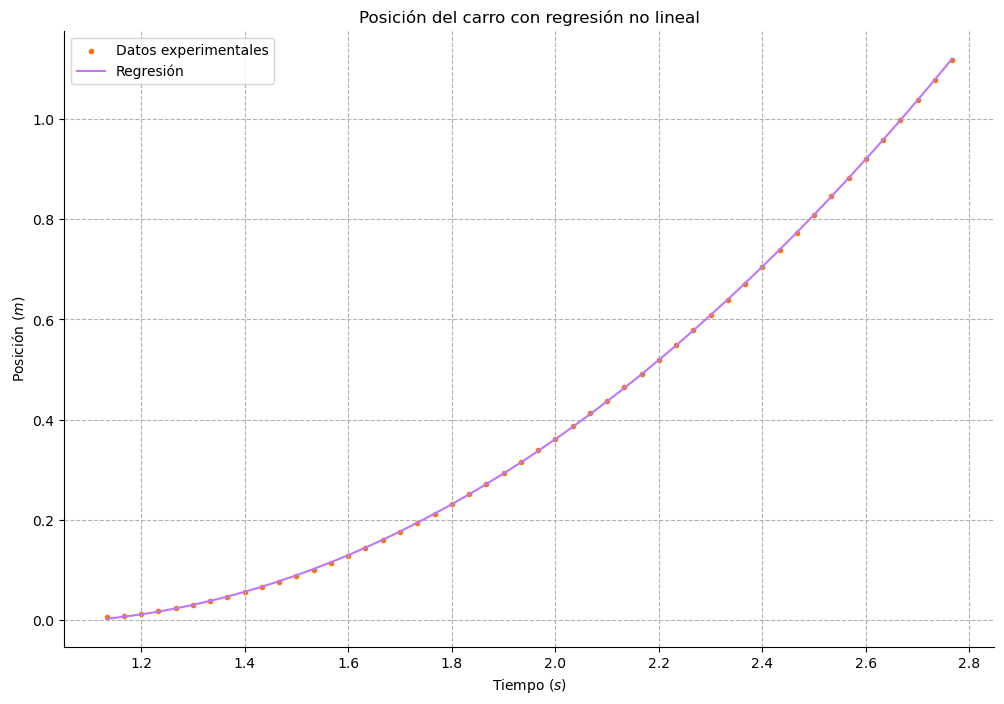

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(fdata[:,0], fdata[:,1], color="xkcd:orange", marker='.', label="Datos experimentales")
plt.plot(fdata[:,0], fitfunc(fdata[:,0], *param), color="xkcd:light purple", label="Regresión")
plt.xlabel("Tiempo $(s)$")
plt.ylabel("Posición $(m)$")
plt.title("Posición del carro con regresión no lineal")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
plt.legend()
#plt.savefig("Hmax.png", dpi=300)
plt.show()

Comparemos con las derivadas numéricas calculadas por Tracker:

In [106]:
a_filter = [not i for i in np.isnan(fdata[:,5])]
a_num = fdata[a_filter]
a_avg = np.average(a_num[:,5])

print(f"El valor de a_x numérico promedio es {a_avg:.3f}m/s^2")
print(f"El valor de a_x de la regresión es {param[2]:.3f}m/s^2")
print(f"La diferencia porcentual es {100*(-param[2]+a_avg)/(param[2]+a_avg):.3f}%")

El valor de a_x numérico promedio es 0.708m/s^2
El valor de a_x de la regresión es 0.706m/s^2
La diferencia porcentual es 0.106%


Tenemos que la diferencia porcentual entre ambos valores es $0.106\%$